In [8]:
from autogluon.tabular import TabularPredictor, TabularDataset
train_path = 'https://autogluon.s3.amazonaws.com/datasets/AdultIncomeBinaryClassification/train_data.csv'
train_data = TabularDataset(train_path)
# predictor = TabularPredictor(label='class').fit(train_data=train_data)

In [9]:
test_path = 'https://autogluon.s3.amazonaws.com/datasets/AdultIncomeBinaryClassification/test_data.csv'
test = TabularDataset(test_path)
test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,31,Private,169085,11th,7,Married-civ-spouse,Sales,Wife,White,Female,0,0,20,United-States,<=50K
1,17,Self-emp-not-inc,226203,12th,8,Never-married,Sales,Own-child,White,Male,0,0,45,United-States,<=50K
2,47,Private,54260,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,60,United-States,>50K
3,21,Private,176262,Some-college,10,Never-married,Exec-managerial,Own-child,White,Female,0,0,30,United-States,<=50K
4,17,Private,241185,12th,8,Never-married,Prof-specialty,Own-child,White,Male,0,0,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,36,Private,191146,Some-college,10,Divorced,Sales,Unmarried,Black,Female,0,0,38,United-States,<=50K
9765,34,Private,422836,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Male,0,0,40,Mexico,<=50K
9766,44,Private,75012,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,80,United-States,<=50K
9767,18,Private,194561,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K


In [10]:
predictor = TabularPredictor.load('AutogluonModels/ag-20231011_211925/')
predictor.leaderboard()

                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2     0.8912       0.176071   7.899971                0.004414           1.443431            2       True         14
1               XGBoost     0.8872       0.037048   2.293252                0.037048           2.293252            1       True         11
2         LightGBMLarge     0.8856       0.031116   1.323646                0.031116           1.323646            1       True         13
3              CatBoost     0.8824       0.015739   5.628891                0.015739           5.628891            1       True          7
4              LightGBM     0.8824       0.018850   0.594374                0.018850           0.594374            1       True          4
5            LightGBMXT     0.8792       0.026381   1.015841                0.026381           1.015841            1       True          3
6       NeuralNetFastAI    

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.8912,0.176071,7.899971,0.004414,1.443431,2,True,14
1,XGBoost,0.8872,0.037048,2.293252,0.037048,2.293252,1,True,11
2,LightGBMLarge,0.8856,0.031116,1.323646,0.031116,1.323646,1,True,13
3,CatBoost,0.8824,0.015739,5.628891,0.015739,5.628891,1,True,7
4,LightGBM,0.8824,0.018850,0.594374,0.018850,0.594374,1,True,4
5,LightGBMXT,0.8792,0.026381,1.015841,0.026381,1.015841,1,True,3
6,NeuralNetFastAI,0.8624,0.089884,48.619934,0.089884,48.619934,1,True,10
7,RandomForestEntr,0.8624,0.104741,1.717403,0.104741,1.717403,1,True,6
8,RandomForestGini,0.8600,0.076961,3.801812,0.076961,3.801812,1,True,5
9,NeuralNetTorch,0.8576,0.033183,47.060863,0.033183,47.060863,1,True,12


In [11]:
known_labels = test['class']
test_data_nolab = test.drop(columns=['class'])  # delete label column
predictions = predictor.predict(test_data_nolab)
predictions

0        <=50K
1        <=50K
2         >50K
3        <=50K
4        <=50K
         ...  
9764     <=50K
9765     <=50K
9766     <=50K
9767     <=50K
9768     <=50K
Name: class, Length: 9769, dtype: object

In [12]:
predictor.evaluate_predictions(y_true=known_labels, y_pred=predictions, auxiliary_metrics=True)

{'accuracy': 0.8763435356740711,
 'balanced_accuracy': 0.7950062351568354,
 'mcc': 0.6395678748952276,
 'f1': 0.710727969348659,
 'precision': 0.798708288482239,
 'recall': 0.640207075064711}

In [13]:
predictor.predict_proba(test_data_nolab)

,<=50K,>50K
0,0.931291,0.068709
1,0.999250,0.000750
2,0.043029,0.956971
3,0.998207,0.001793
4,0.988926,0.011074
...,...,...
9764,0.977868,0.022132
9765,0.941992,0.058008
9766,0.866390,0.133610
9767,0.999667,0.000333


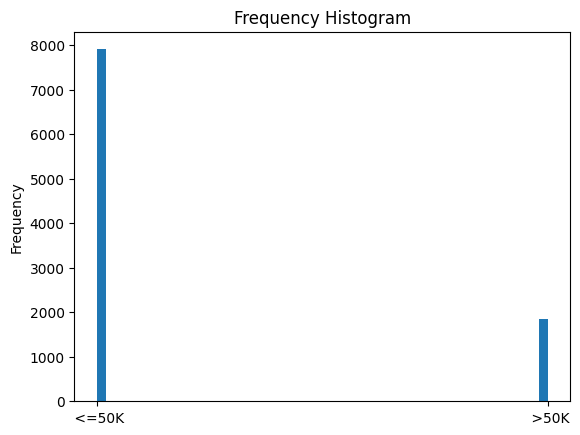

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(predictions, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

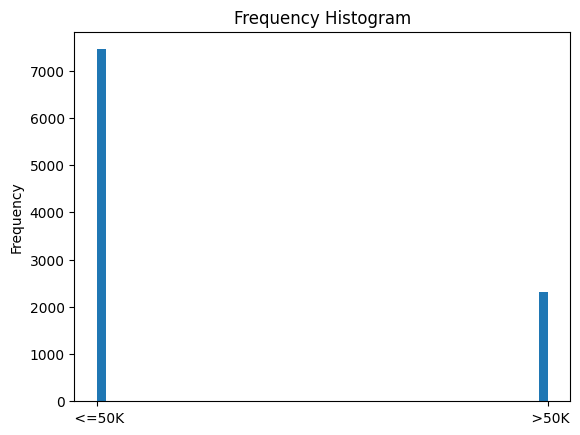

In [21]:
plt.hist(known_labels, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')


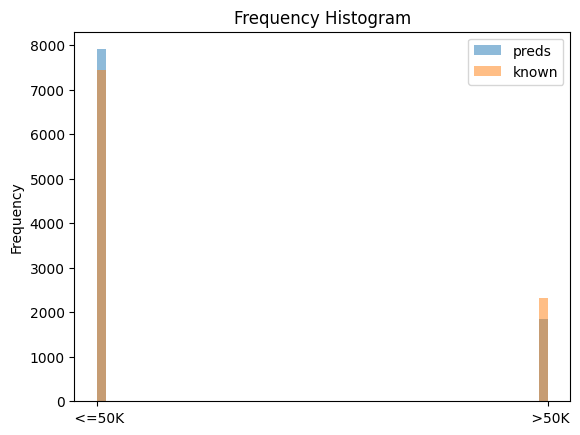

In [22]:
# compare preds vs known
plt.hist(predictions, bins=50, alpha=0.5, label='preds')
plt.hist(known_labels, bins=50, alpha=0.5, label='known')
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.legend()
    

<Axes: >

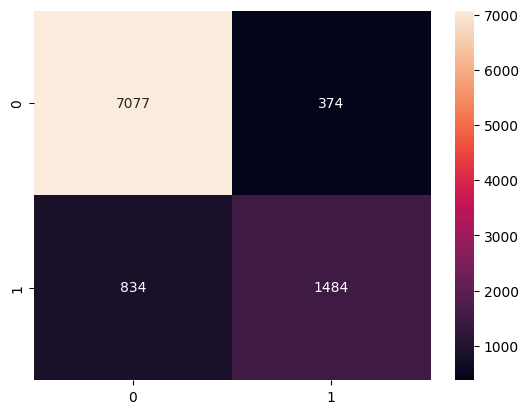

In [27]:

# do a confusion matrix visual with preds vs known seaborn, make the numbers not scientific notation
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(known_labels, predictions)
sns.heatmap(cm, annot=True, fmt='g')

